<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="#">
         <img src="https://futurehealthcaretoday.com/wp-content/uploads/2020/12/datatrendsqlik-scaled.jpg" width="300" align="center">
    </a>
    

  






<h1>Introduction</h1>


<p>
The database is insurance information on the population of the Northeastern and
Southeastern United States and gathers information on the population between 18 and 68 years of age.
The variables and data collected and associated with this population are the genders of the person who contracted the health insurance. The main objective is to clean the information and prepare it for its statistical analysis and with it the interpretation of the data to find patterns and trends.
</p>

<h1>Exploratory Analysis</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>  
    <li>Find how many records this data frame has?</li>
    <li>How many elements are there?</li>
    <li>What are the column names?</li>
    <li>What types of columns we have in this data frame?</li>
    <li>Check a particular column type, Check types for all the columns</li>
    <li>Give the summary for the numeric columns in the dataset</li>
    <li>Calculate standard deviation for all numeric columns</li>
    <li>Calculate the mean and other statistical measures after subsetting a dataset</li>
</ol>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from math import sqrt

In [ ]:
#Read Excel file
df = pd.read_excel("MedicalCosts.xlsx")

In [ ]:
#Display First few Records
df.head()

,age,sex,bmi,life expectancy at birth,children,smoker,region,charges
0,NaN,female,27.900,68,0,yes,southwest,16884.92400
1,18.0,male,33.770,73,1,no,southeast,1725.55230
2,28.0,male,33.000,73,3,no,southeast,4449.46200
3,33.0,male,22.705,73,0,no,northwest,21984.47061
4,32.0,male,28.880,73,0,no,northwest,3866.85520


In [ ]:
#Display First 20 Records
df.head(20)

,age,sex,bmi,life expectancy at birth,children,smoker,region,charges
0,NaN,female,27.900,68,0,yes,southwest,16884.92400
1,18.0,male,33.770,73,1,no,southeast,1725.55230
2,28.0,male,33.000,73,3,no,southeast,4449.46200
3,33.0,male,22.705,73,0,no,northwest,21984.47061
4,32.0,male,28.880,73,0,no,northwest,3866.85520
5,31.0,female,25.740,79,0,no,southeast,3756.62160
6,46.0,female,33.440,79,1,no,southeast,8240.58960
7,37.0,female,NaN,79,3,no,northwest,NaN
8,37.0,male,29.830,73,2,no,northeast,6406.41070
9,60.0,female,25.840,79,0,no,northwest,28923.13692


In [ ]:
df.tail(5)

,age,sex,bmi,life expectancy at birth,children,smoker,region,charges
1333,50.0,male,NaN,73,3,no,northwest,10600.5483
1334,18.0,female,NaN,79,0,no,northeast,2205.9808
1335,18.0,female,NaN,79,0,no,southeast,1629.8335
1336,21.0,female,NaN,79,0,no,southwest,2007.9450
1337,61.0,female,NaN,68,0,yes,northwest,29141.3603


<h2> Elements, Columns names, Check Data Types </h2>


In [ ]:
#Find how many records this data frame has
df.shape

(1338, 8)

In [ ]:
#How many elements are there?
df.size

In [ ]:
#What are the column names?
df.columns

Index(['age', 'sex', 'bmi', 'life expectancy at birth', 'children', 'smoker',
       'region', 'charges'],
      dtype='object')

In [ ]:
#What types of columns we have in this data frame?
df.dtypes

age                         float64
sex                          object
bmi                         float64
life expectancy at birth      int64
children                      int64
smoker                       object
region                       object
charges                     float64
dtype: object

In [ ]:
#Check a particular column type 
df['bmi'].dtype

dtype('float64')

In [ ]:
#Get list of pandas dataframe column names based on data type
# Get  columns whose data type is object i.e. string
filteredColumns = df.dtypes[df.dtypes =='float64']
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['age', 'bmi', 'charges']


In [ ]:
#Include only numeric (int64) column in the dataframe
df1= df.select_dtypes(exclude='int64')
df1

,age,sex,bmi,smoker,region,charges
0,NaN,female,27.900,yes,southwest,16884.92400
1,18.0,male,33.770,no,southeast,1725.55230
2,28.0,male,33.000,no,southeast,4449.46200
3,33.0,male,22.705,no,northwest,21984.47061
4,32.0,male,28.880,no,northwest,3866.85520
...,...,...,...,...,...,...
1333,50.0,male,NaN,no,northwest,10600.54830
1334,18.0,female,NaN,no,northeast,2205.98080
1335,18.0,female,NaN,no,southeast,1629.83350
1336,21.0,female,NaN,no,southwest,2007.94500


In [ ]:
df1.dtypes

age        float64
sex         object
bmi        float64
smoker      object
region      object
charges    float64
dtype: object

<h2> Basic statistics for the numeric columns </h2>

In [ ]:
#Output basic statistics for the numeric columns
df.describe()

,age,bmi,life expectancy at birth,children,charges
count,1291.000000,1267.000000,1338.000000,1338.000000,1251.000000
mean,39.238575,30.661093,73.597160,1.094918,13137.994422
std,13.957036,6.098797,5.800592,1.205493,11963.062505
min,18.000000,16.815000,61.000000,0.000000,1121.873900
25%,27.000000,26.302500,73.000000,0.000000,4719.630300
50%,39.000000,30.360000,73.000000,1.000000,9361.326800
75%,51.000000,34.687500,79.000000,2.000000,16265.346500
max,64.000000,53.130000,79.000000,5.000000,62592.873090


In [ ]:
#In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

df.describe(include=["object", "bool"])

,sex,smoker,region
count,1338,1338,1321
unique,2,2,4
top,male,no,southeast
freq,676,1064,360


In [ ]:
#Calculate mean for all numeric columns
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                            39.238575
bmi                            30.661093
life expectancy at birth       73.597160
children                        1.094918
charges                     13137.994422
dtype: float64

In [ ]:
#Calculate MAX values for all numeric columns
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                                64.0
sex                                male
bmi                               53.13
life expectancy at birth             79
children                              5
smoker                              yes
charges                     62592.87309
dtype: object

In [ ]:
#Calculate the standard deviation (std() method) for all numeric columns
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                            13.957036
bmi                             6.098797
life expectancy at birth        5.800592
children                        1.205493
charges                     11963.062505
dtype: float64

With the exploration of our database we now know the size and shape of the base, we know that there are numerical and categorical values and also that we have values that are missing.

In order to carry out the statistical analysis it is necessary to impute the missing values.

<h1>Impute missing values and Bloxplots of the data</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>  
    <li>Mean</li>
    <li>Ratio Imputation</li>
    <li>Regression</li>
    
</ol>

In [ ]:
#Missing calues for each variable
df.isnull().sum()

age                         47
sex                          0
bmi                         71
life expectancy at birth     0
children                     0
smoker                       0
region                      17
charges                     87
dtype: int64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


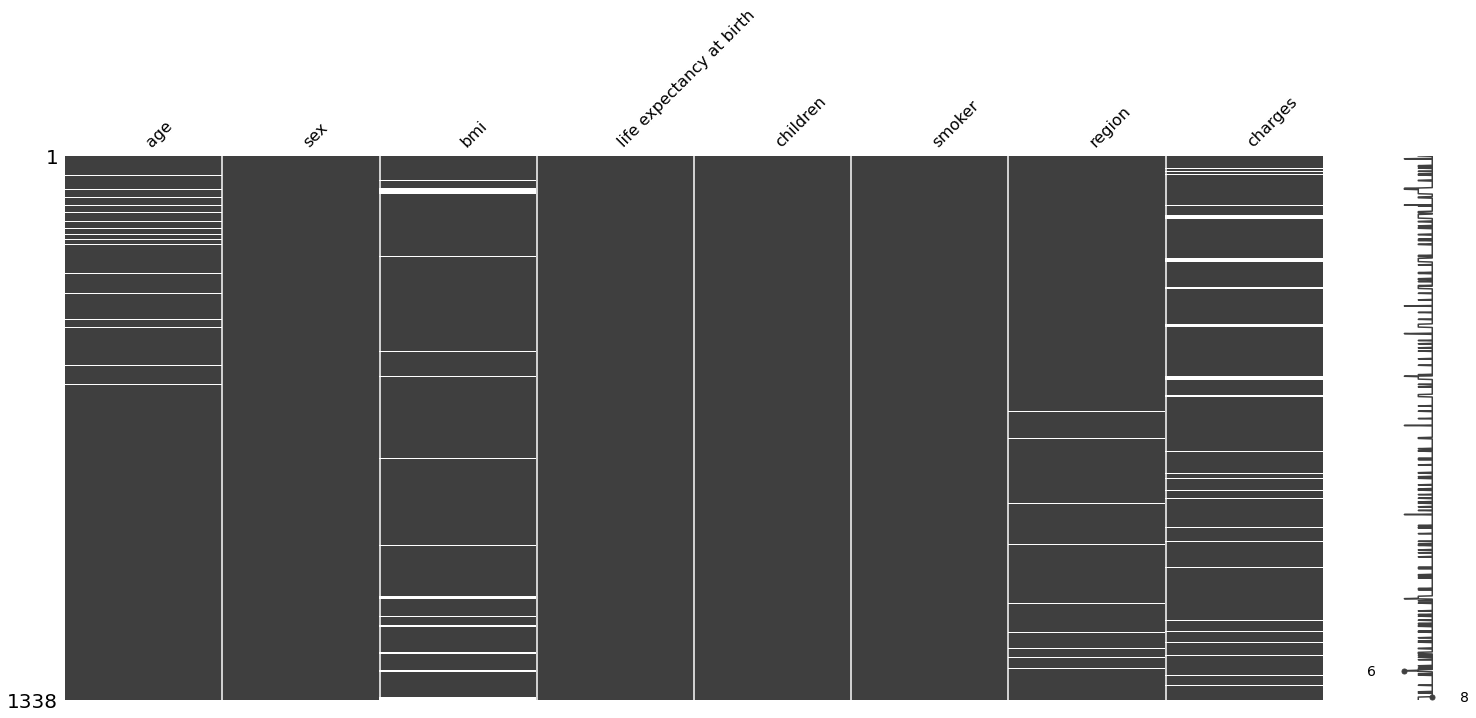

In [ ]:
!pip install missingno 
import missingno as msno
#Detecting missing values and their distribution
msno.matrix(df)

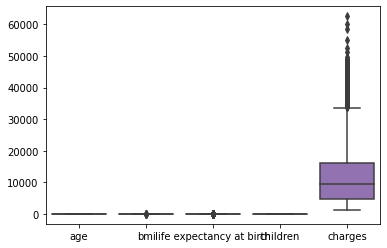

In [ ]:


sns.boxplot(data=df)

There are a lot of outliers in Charges variable

In [ ]:
#find out quick stadistics of Charges
df['charges'].describe()

count     1251.000000
mean     13137.994422
std      11963.062505
min       1121.873900
25%       4719.630300
50%       9361.326800
75%      16265.346500
max      62592.873090
Name: charges, dtype: float64

It has a hudge std, the values are far away of the mean. 

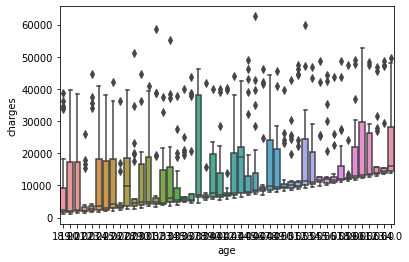

In [ ]:
#why there are differences in the mean charges?
sns.boxplot(x='age', y='charges', data=df)

The charges increase with the age

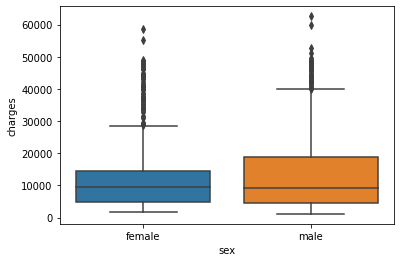

In [ ]:
sns.boxplot(x='sex', y='charges', data=df)

The median between gender si similar, but its seems to be more expensive the insurance pan for the men. 

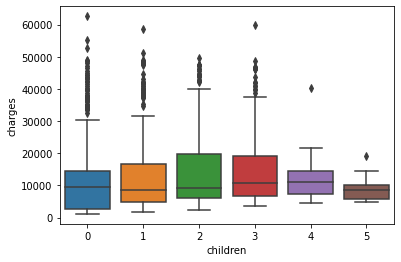

In [ ]:
sns.boxplot(x='children', y='charges', data=df)

If the titular has more children then the plan increase the charges. But with more than 3 childrens the carges drop down. 

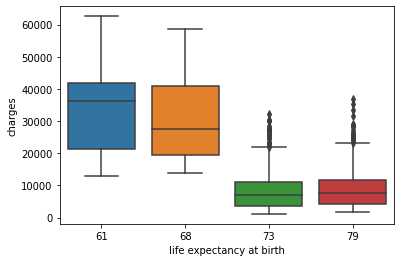

In [ ]:
sns.boxplot(x='life expectancy at birth', y='charges', data=df)

<h3> Mean Impute </h3>

In [ ]:
#For the data type columns with missing data: age, charges and bmi
df.dtypes


age                         float64
sex                          object
bmi                         float64
life expectancy at birth      int64
children                      int64
smoker                       object
region                       object
charges                     float64
dtype: object

In [ ]:
meancharges = df['charges'].mean()
dfmeancharges= df.copy()
dfmeancharges['charges'].fillna(value=meancharges, inplace=True)
print('Updated Dataframe:')
print(dfmeancharges.isnull().sum())

Updated Dataframe:
age                         47
sex                          0
bmi                         71
life expectancy at birth     0
children                     0
smoker                       0
region                      17
charges                      0
dtype: int64


In [ ]:
meanage = df['age'].mean()
dfage= dfmeancharges.copy()
dfage['age'].fillna(value=meanage, inplace=True)
print('Updated Dataframe:')
print(dfage.isnull().sum())

Updated Dataframe:
age                          0
sex                          0
bmi                         71
life expectancy at birth     0
children                     0
smoker                       0
region                      17
charges                      0
dtype: int64


In [ ]:
meanbmi = df['bmi'].mean()
dfbmi= dfage.copy()
dfbmi['bmi'].fillna(value=meanage, inplace=True)
print('Updated Dataframe:')
print(dfbmi.isnull().sum())

Updated Dataframe:
age                          0
sex                          0
bmi                          0
life expectancy at birth     0
children                     0
smoker                       0
region                      17
charges                      0
dtype: int64


In [ ]:
# Filling categorical variable with most occurring class

dfinal = dfbmi.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(dfinal.isnull().sum())

age                         0
sex                         0
bmi                         0
life expectancy at birth    0
children                    0
smoker                      0
region                      0
charges                     0
dtype: int64


The data frame dfinalmean is the final data frame with impute mean method , the data frame is complete.

In [ ]:
 dfinal.describe()

,age,bmi,life expectancy at birth,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.238575,31.116251,73.597160,1.094918,13137.994422
std,13.709523,6.238574,5.800592,1.205493,11567.291357
min,18.000000,16.815000,61.000000,0.000000,1121.873900
25%,27.000000,26.600000,73.000000,0.000000,4925.098675
50%,39.238575,30.800000,73.000000,1.000000,10054.331000
75%,51.000000,35.750000,79.000000,2.000000,14585.946738
max,64.000000,53.130000,79.000000,5.000000,62592.873090


<h3> Ratio Imputation </h3>

In [ ]:
dfimputation = df.copy()



In [ ]:
dfimputation.isnull().sum()

age                         47
sex                          0
bmi                         71
life expectancy at birth     0
children                     0
smoker                       0
region                      17
charges                     87
dtype: int64

In [ ]:
a = dfimputation.isnull().sum()/len(dfimputation)*100
variables = dfimputation.columns


variable=[]
variables = dfimputation.columns

for i in range(dfimputation.columns.shape[0]):
    if a[i]<=0.10:
      variable.append(variables[i])



In [ ]:
dfratio = dfimputation[variable]
dfratio.isnull().sum()

sex                         0
life expectancy at birth    0
children                    0
smoker                      0
dtype: int64

<h3> Lineal Regression Imputation </h3>

In [ ]:
dflinealregression = df.copy()
dflinealregression.corr()

,age,bmi,life expectancy at birth,children,charges
age,1.000000,0.109377,0.028902,0.035502,0.293101
bmi,0.109377,1.000000,-0.036242,0.010129,0.196758
life expectancy at birth,0.028902,-0.036242,1.000000,-0.016348,-0.663241
children,0.035502,0.010129,-0.016348,1.000000,0.072687
charges,0.293101,0.196758,-0.663241,0.072687,1.000000


<p> Based in the correlations, we are using age + charges (independent)to impute age missing values, 
 bmi + charges (independent) to impute bmi missing values, 
charges + age (independent) to impute charges missing values
 </p>

In [ ]:
dfregre1 = dflinealregression[['charges','age']]
imp1 = IterativeImputer(max_iter=10, random_state=0)
imp1.fit(dfregre1)
imputed1=imp1.transform(dfregre1)
imputed_to_df1=pd.DataFrame(imputed1)
imputed_to_df1.columns=[['charges','age']]
imputed_to_df1.isnull().sum()

charges    0
age        0
dtype: int64

In [ ]:
dfregre2 = dflinealregression[['charges','bmi']]
imp2 = IterativeImputer(max_iter=10, random_state=0)
imp2.fit(dfregre2)
imputed2=imp2.transform(dfregre2)
imputed_to_df2=pd.DataFrame(imputed2)
imputed_to_df2.columns=[['charges','bmi']]
imputed_to_df2.isnull().sum()

charges    0
bmi        0
dtype: int64

In [ ]:
dfregre3 = dflinealregression[['charges','bmi']]
imp3 = IterativeImputer(max_iter=10, random_state=0)
imp3.fit(dfregre3)
imputed3=imp3.transform(dfregre3)
imputed_to_df3=pd.DataFrame(imputed3)
imputed_to_df3.columns=[['charges','bmi']]
imputed_to_df3.isnull().sum()

charges    0
bmi        0
dtype: int64

<h2> Exploratory Data with no Missing Values, the Final Data Set </h2>

In [ ]:
dfinal.isnull().sum()

age                         0
sex                         0
bmi                         0
life expectancy at birth    0
children                    0
smoker                      0
region                      0
charges                     0
dtype: int64

In [ ]:
#Download the final data set.
dfinal.to_excel('finaldata.xlsx')

In [ ]:
dfinal.shape

(1338, 8)

In [ ]:
dfinal.dtypes

age                         float64
sex                          object
bmi                         float64
life expectancy at birth      int64
children                      int64
smoker                       object
region                       object
charges                     float64
dtype: object

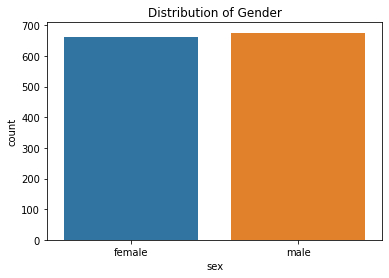

In [ ]:
#Distributions gender, age, charges, zone, bmi
sns.countplot(x='sex', data=dfinal);
plt.title('Distribution of Gender');

Almost the same distribution between gender

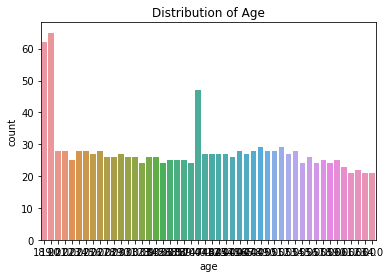

In [ ]:
sns.countplot(x='age', data=dfinal);
plt.title('Distribution of Age');

Most frequency in the ages og 18 and 19

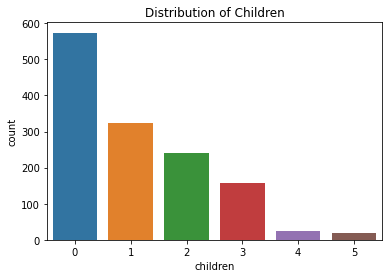

In [ ]:
sns.countplot(x='children', data=dfinal);
plt.title('Distribution of Children');

Arround 560 people dont have children, if they have the most common is to have just 1. 

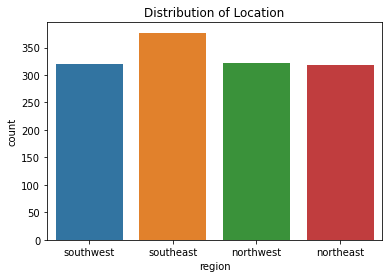

In [ ]:
sns.countplot(x='region', data=dfinal);
plt.title('Distribution of Location');

Southeast the region where most people live, and then the other 3 regions have fairly the same distribution. 

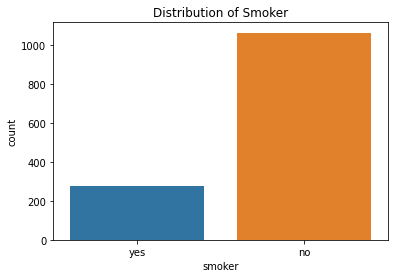

In [ ]:
sns.countplot(x='smoker', data=dfinal);
plt.title('Distribution of Smoker');

Most of the insured don't smoke

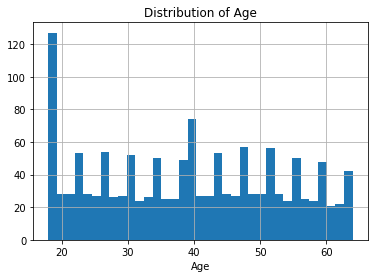

In [ ]:
# Create a histogram of ages
dfinal.hist('age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

The age doesn't have a normal distribution

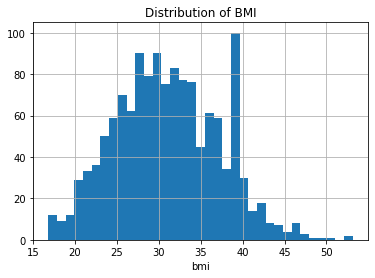

In [ ]:
# Create a histogram of BMI
dfinal.hist('bmi', bins=35);
plt.title('Distribution of BMI');
plt.xlabel('bmi');

The BMI has a normal distribution

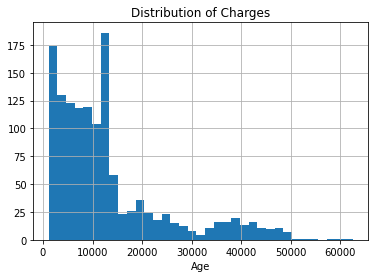

In [ ]:
c

The charges variable is right skewed

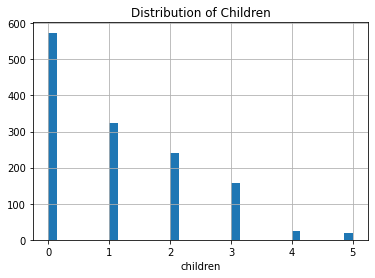

In [ ]:
# Create a histogram of charges
dfinal.hist('children', bins=35);
plt.title('Distribution of Children');
plt.xlabel('children');

The chikdrens variable is right skewed

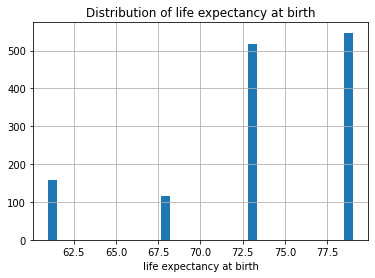

In [ ]:
# Create a histogram of charges
dfinal.hist('life expectancy at birth', bins=35);
plt.title('Distribution of life expectancy at birth');
plt.xlabel('life expectancy at birth');
 

We can say birth variable is left skewed

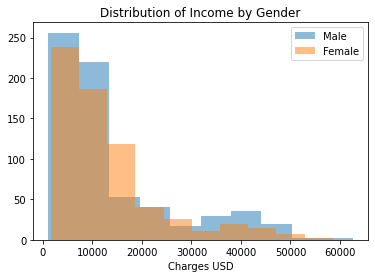

In [ ]:
# Histogram of charge by gender
plt.hist('charges', data=dfinal[dfinal['sex'] == 'male'], alpha=0.5, label='Male');
plt.hist('charges', data=dfinal[dfinal['sex'] == 'female'], alpha=0.5, label='Female');
plt.title('Distribution of Charges by Gender');
plt.xlabel('Charges USD');
plt.legend();

The relation between male and female are the same trough the charges

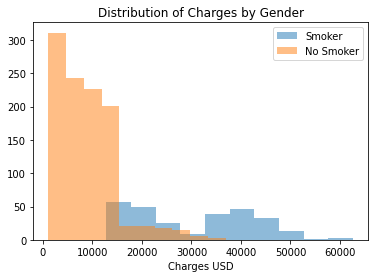

In [ ]:
# Histogram of charge by smoke
plt.hist('charges', data=dfinal[dfinal['smoker'] == 'yes'], alpha=0.5, label='Smoker');
plt.hist('charges', data=dfinal[dfinal['smoker'] == 'no'], alpha=0.5, label='No Smoker');
plt.title('Distribution of Charges by Gender');
plt.xlabel('Charges USD');
plt.legend();

The relation between smoker and non smoker is different trough the charges, there ir a positve correlation if they are smokers the chargres are higher 

In [ ]:
sns.heatmap(dfinal.corr(),annot=True)

NameError: ignored

Heat corraletion map, the highest correlation is life expentancy and charge a negative one, then charges and age and bmi and charges. 

<h2> Skew and Transform </h2>

In [ ]:
dfinal.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
age,0.055656,-1.166991
bmi,0.169397,-0.346419
life expectancy at birth,-0.966596,0.034669
children,0.938380,0.202454
charges,1.580997,1.971509
P_sqrt,-0.159923,-1.215515


fairly symmetrical : -0.5 to 0.5 : age, bmi

Moderate Skewed: -0.5 to -1.0 and 0.5 to 1.0 : life expectancy, children

Highly skewed : <-1.0 and >1.0 : charges

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63432a5690>,
      dtype=object)

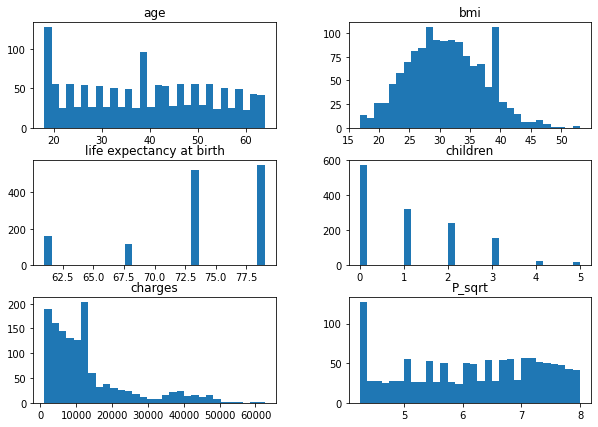

In [ ]:
dfinal.hist(grid=False,figsize=(10,7),bins=30)

In [ ]:
from scipy.stats import skew, kurtosis
print("Negative",skew(dfinal.iloc[:,2]))
print("reversed",skew(max(dfinal.iloc[:,2]+1)-dfinal.iloc[:,2]))

Negative 0.1692068780890124
reversed -0.16920687808901078


In [ ]:
#sqrt Transform
#left skewed
import numpy as np

dfinal.insert(len(dfinal.columns),'N_sqrt',np.sqrt(max(dfinal.iloc[:,2]+1)- df.iloc[:,2]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2c59dad90>,
      dtype=object)

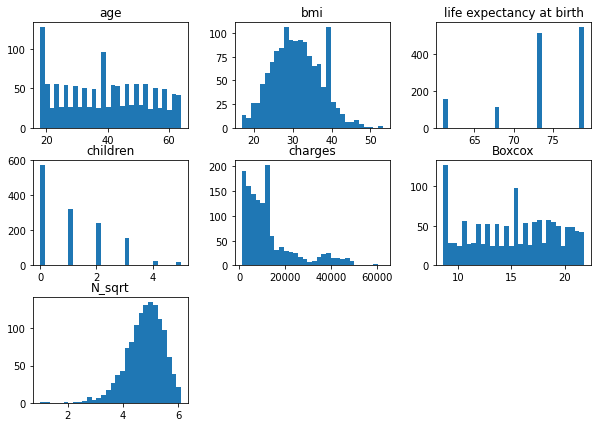

In [ ]:
dfinal.hist(grid=False,figsize=(10,7),bins=30)

In [ ]:
from scipy.stats import boxcox

dfinal.insert(len(dfinal.columns),'Boxcox',boxcox(dfinal.iloc[:,0])[0])

ValueError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2c599e190>,
      dtype=object)

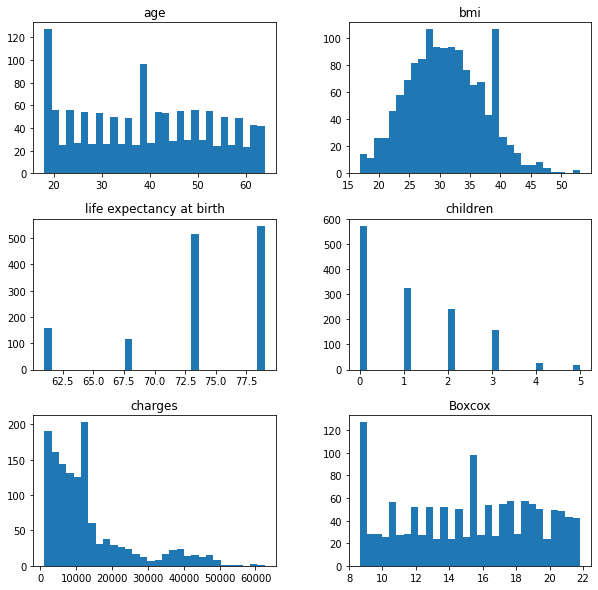

In [ ]:
dfinal.hist(grid=False,figsize=(10,10),bins=30)

<h2> KPIs  - Key Performance Indicator </h2>

In [ ]:
# The Cost Per Insured, limit of cost, when it exceeds that threshold it is a catastrophic expense
dfinal['charges'].mean()

13137.994421613908

In [ ]:
#Define SD of charges
#Quartile 1 and 3
Q1 = dfinal.charges.quantile(0.25)
Q3 = dfinal.charges.quantile(0.75)

Q1,Q3

(4925.098675, 14585.9467375)

In [ ]:
#Interquartile Range
IQR = Q3 -Q1
IQR

9660.848062500001

In [ ]:
#Limits
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit, upper_limit

(-9566.17341875, 29077.21883125)

In [ ]:
# Number of elder insured
kpi2 = dfinal['age'].value_counts(bins=4).to_frame()
kpi2

,age
"(17.953, 29.5]",398
"(29.5, 41.0]",352
"(41.0, 52.5]",304
"(52.5, 64.0]",284


In [ ]:
# last bin to keep under control, the peole who most health expenses ARE
#284 

kpi2['age'].mean()

334.5

284 is the start value, more than 334 is a red light

In [ ]:
!pip install nbconvert
!jupyter nbconvert --to html /content/final.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook /content/final.ipynb to html
[NbConvertApp] Writing 743102 bytes to /content/final.html
